参考

[Pulp による数理最適化入門](http://www.nct9.ne.jp/m_hiroi/light/pulp01.html)

[PyomoとIPOPTで非線形計画問題を解く](https://helve-blog.com/posts/python/pyomo-nonlinear-programming/)

IPOPTに使われている主双対内点法の概要
[非線形計画問題の主双対内点法](https://helve-blog.com/posts/math/primal_dual_interior_point_methd_nlp/)

### 施設配置問題
店舗$i$の座標を$(x_i, y_i)$、
配送センターから最も遠い店舗への直線距離を$r$とおくと、
\begin{align}
&minimize &r & \\
&s.t.        &(x_i - x_1)^2 + (y_i - x_2)^2 \le r^2,    &i = 1,... ,n   \\
&            &r\ge 0&
\end{align}

In [1]:
import pulp

In [2]:
prob = pulp.LpProblem(sense='LpMaximize')

In [3]:
# 店舗iの座標を設定
import random

def make_data(n):
    I = range(1,n+1)    # 店舗の集合
    x,y = {},{}
    for i in I:
        x[i] = random.uniform(-100,100)
        y[i] = random.uniform(-100,100)
    return I,x,y

I,x,y = make_data(10)

In [4]:
# 変数
r = pulp.LpVariable('r', lowBound=0)
vx = pulp.LpVariable('x')
vy = pulp.LpVariable('y')

# 目的関数
prob += r

# 制約条件
for i in I:
    prob += (x[i]-vx)**2 + (y[i]-vy)**2 <= r**2

TypeError: unsupported operand type(s) for ** or pow(): 'LpAffineExpression' and 'int'

In [5]:
import pyomo.environ as pyo

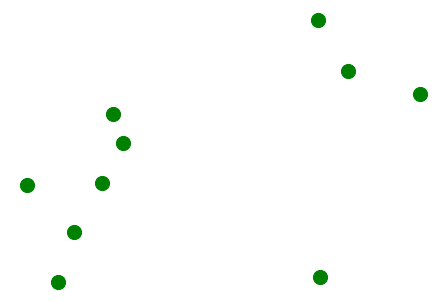

In [6]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(I)

position = {}
for i in I:
    position[i] = (x[i], y[i])
nx.draw(G,pos=position, node_size=200, node_color="g", nodelist=I)

In [7]:
model = pyo.ConcreteModel(name='Facility Location')

# 変数の定義
# 第一引数にベクトルのサイズを定義
# domainは変数の種類
model.x = pyo.Var([1,2], domain=pyo.Reals)
model.r = pyo.Var(domain=pyo.NonNegativeReals)

# 目的関数の定義
# 定義した変数を用いてexprに目的関数を記述
# senseで最小化問題に設定
model.OBJ = pyo.Objective(expr = model.r,
                         sense = pyo.minimize)

# 制約条件の定義
model.Constraint = pyo.ConstraintList()
for i in I:
    model.Constraint.add(expr = (x[i]-model.x[1])**2 + (y[i]-model.x[2])**2 <= model.r**2)

opt = pyo.SolverFactory('ipopt')
res = opt.solve(model, tee=True)

Ipopt 3.13.4: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total 

In [8]:
# 最適化結果の概要
print(res)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.13.4\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.05919790267944336
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [9]:
# 最適化後の目的関数の値
print(model.OBJ())

86.3634301354659


In [10]:
# 最適化後の変数の値
print(model.x[1](), model.x[2]())

-26.751466945797535 -11.478203659587958


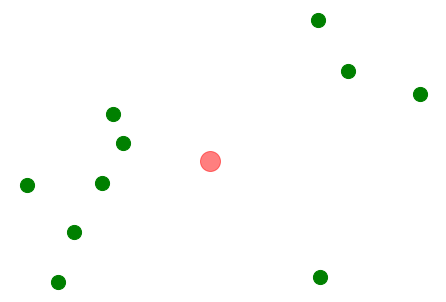

In [11]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(I)
G.add_nodes_from(["D"])

position = {}
for i in I:
    position[i] = (x[i], y[i])
position["D"] = (model.x[1](),model.x[2]())
nx.draw(G,pos=position, node_size=200, node_color="g", nodelist=I)
nx.draw(G,pos=position, node_size=400, node_color="red", nodelist=["D"],alpha=0.5)

### 円詰め込み問題

タイヤ$i$の半径$r_i$、中心の座標$(x_i, y_i)$

コンテナ幅$W$

コンテナ長さ$L$

\begin{align}
&minimize &L  &&\\
&s.t.        &(x_i - x_j)^2 + (y_i - y_j)^2 \ge (r_i + r_j)^2,    &1\le i < j \le n  \\
&            &r_i\le x_i \le L - r_i& i=1,...,n \\
&            &r_i \le y_i \le W - r_i & i = 1,..,n
\end{align}

In [23]:
# タイヤの半径を設定

def make_tire_data(n):
    I = range(1,n+1)    # タイヤの集合
    r = {}
    for i in I:
        r[i] = random.randint(1,10)
    return I,r

N = 20
I,r = make_tire_data(N)
W = 30

In [24]:
print(r)

{1: 2, 2: 1, 3: 5, 4: 4, 5: 7, 6: 6, 7: 9, 8: 6, 9: 2, 10: 10, 11: 8, 12: 4, 13: 4, 14: 2, 15: 8, 16: 8, 17: 7, 18: 4, 19: 1, 20: 2}


In [25]:
model = pyo.ConcreteModel(name='')

# 変数の定義
model.L = pyo.Var(domain=pyo.NonNegativeReals)
model.x = pyo.Var([i for i in I], domain=pyo.NonNegativeReals)
model.y = pyo.Var([i for i in I], domain=pyo.NonNegativeReals)

# 目的関数の定義
model.OBJ = pyo.Objective(expr = model.L,
                         sense = pyo.minimize)

# 制約条件の定義
model.Constraint = pyo.ConstraintList()
for i in I:
    for j in range(1,i):
        model.Constraint.add(expr = (model.x[j] - model.x[i])**2 + (model.y[j] - model.y[i])**2 >= (r[j]+r[i])**2 )
for i in I:
    model.Constraint.add(expr = r[i] <=model.x[i])
    model.Constraint.add(expr = model.x[i] <= model.L -r[i])
    model.Constraint.add(expr = r[i] <= model.y[i])
    model.Constraint.add(expr = model.y[i] <= W - r[i])

opt = pyo.SolverFactory('ipopt')
res = opt.solve(model, tee=True)

Ipopt 3.13.4: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      860
Number of nonzeros in Lagrangian Hessian.............:      420

Total number of variables............................:       41
                     variables with only lower bounds:       41
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total 

  94r 3.8295885e+01 2.88e+02 9.99e+02   2.5 0.00e+00    -  0.00e+00 3.08e-07R  2
  95r 3.8488795e+01 2.87e+02 9.99e+02   2.5 2.62e+04    -  6.10e-03 2.89e-04f  1
  96r 4.0671527e+01 2.87e+02 9.98e+02   1.1 8.00e+04    -  1.92e-03 1.14e-03f  1
  97r 4.1211278e+01 2.87e+02 9.97e+02   1.1 9.63e+04    -  1.23e-03 2.83e-04f  1
  98r 4.1363269e+01 2.87e+02 9.97e+02   1.1 2.20e+04    -  5.74e-03 3.10e-04f  1
  99r 4.1964051e+01 2.87e+02 9.95e+02   1.1 1.14e+04    -  3.21e-04 2.23e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100r 4.3005914e+01 2.87e+02 9.91e+02   1.1 1.31e+04    -  3.88e-03 3.87e-03f  1
 101r 4.3958118e+01 2.87e+02 9.84e+02   1.1 1.30e+04    -  6.54e-03 6.66e-03f  1
 102r 4.4028985e+01 2.87e+02 9.82e+02   1.1 3.55e+02    -  2.46e-03 1.34e-02f  1
 103r 4.4056635e+01 2.87e+02 9.70e+02   1.1 1.39e+03    -  1.15e-02 3.76e-03f  1
 104r 4.4149760e+01 2.86e+02 9.62e+02   1.1 9.99e+02    -  7.83e-03 1.48e-02f  1
 105r 4.4157589e+01 2.86e+02

 317r 6.4754552e+01 2.56e+02 6.64e+01  -2.7 3.95e+01  -0.4 2.79e-02 1.73e-02f  1
 318r 6.4811980e+01 2.56e+02 3.63e+02  -2.7 8.85e+00   0.0 1.19e-01 6.69e-01f  1
 319r 6.4829985e+01 2.56e+02 1.95e+02  -2.7 4.14e+00   0.4 5.98e-03 4.97e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320r 6.4913471e+01 2.56e+02 8.11e+01  -2.7 1.76e+01  -0.0 5.08e-02 5.86e-01f  1
 321r 6.4913664e+01 2.56e+02 8.08e+01  -2.7 6.45e+00   0.4 6.60e-01 3.66e-03f  1
 322r 6.4932047e+01 2.56e+02 1.40e+01  -2.7 2.21e+00   0.8 1.00e+00 1.00e+00f  1
 323r 6.4980033e+01 2.56e+02 1.57e+01  -2.7 7.68e+00   0.3 1.00e+00 7.65e-01f  1
 324r 6.5003864e+01 2.56e+02 1.65e+01  -2.7 2.93e+00   0.8 1.00e+00 1.00e+00f  1
 325r 6.5051780e+01 2.56e+02 1.82e+01  -2.7 1.04e+01   0.3 2.72e-01 5.80e-01f  1
 326r 6.5051897e+01 2.56e+02 1.82e+01  -2.7 3.84e+00   0.7 1.00e+00 3.79e-03f  1
 327r 6.5054472e+01 2.56e+02 2.81e+01  -2.7 1.30e+01   0.2 1.12e-01 2.51e-02f  1
 328r 6.5065464e+01 2.56e+02

 500r 6.8695900e+01 2.56e+02 1.02e-01  -4.0 1.76e-02   0.8 1.00e+00 1.00e+00f  1
 501r 6.8695855e+01 2.56e+02 1.08e-01  -4.0 7.03e-03   1.2 1.00e+00 7.86e-01f  1
 502r 6.8695762e+01 2.56e+02 1.21e-01  -4.0 2.34e-02   0.7 1.00e+00 1.00e+00f  1
 503r 6.8695739e+01 2.56e+02 1.29e-01  -4.0 9.35e-03   1.1 1.00e+00 1.00e+00f  1
 504r 6.8695694e+01 2.56e+02 1.53e-01  -4.0 3.33e-02   0.7 1.00e+00 1.00e+00f  1
 505r 6.8695678e+01 2.56e+02 1.63e-01  -4.0 1.33e-02   1.1 1.00e+00 1.00e+00f  1
 506r 6.8695637e+01 2.56e+02 2.01e-01  -4.0 4.91e-02   0.6 1.00e+00 1.00e+00f  1
 507r 6.8695624e+01 2.56e+02 2.18e-01  -4.0 2.00e-02   1.0 1.00e+00 1.00e+00f  1
 508r 6.8695599e+01 2.56e+02 2.80e-01  -4.0 7.70e-02   0.6 1.00e+00 1.00e+00f  1
 509r 6.8695595e+01 2.56e+02 3.07e-01  -4.0 3.17e-02   1.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510r 6.8695591e+01 2.56e+02 4.07e-01  -4.0 1.26e-01   0.5 1.00e+00 1.00e+00f  1
 511r 6.8695592e+01 2.56e+02

 684r 7.0150172e+01 2.56e+02 4.99e+02  -4.0 4.03e+01   0.2 2.42e-01 1.00e+00f  1
 685r 7.0148924e+01 2.56e+02 7.21e+02  -4.0 4.33e+02  -0.3 6.26e-06 8.92e-02f  1
 686r 7.0148449e+01 2.56e+02 4.12e+02  -4.0 7.57e+01   0.1 3.04e-01 1.27e-01f  1
 687r 7.0148449e+01 2.56e+02 3.71e+02  -4.0 1.36e+03  -0.3 3.83e-03 4.03e-07f  1
 688r 7.0145063e+01 2.56e+02 1.16e+03  -4.0 9.09e+01   0.1 6.40e-04 8.45e-01f  1
 689r 7.0145060e+01 2.56e+02 1.16e+03  -4.0 1.03e+03  -0.4 1.92e-04 2.57e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690r 7.0143325e+01 2.56e+02 8.98e+02  -4.0 1.32e+02   0.0 1.68e-01 3.89e-01f  1
 691r 7.0143325e+01 2.56e+02 8.98e+02  -4.0 2.06e+03  -0.4 1.86e-06 1.90e-06f  1
 692r 7.0143325e+01 2.56e+02 8.98e+02  -4.0 7.43e+01  -0.0 1.55e-02 2.98e-07f  1
 693r 7.0143194e+01 2.56e+02 1.52e+03  -4.0 2.05e+01  -0.5 7.09e-01 8.76e-03f  1
 694r 7.0143113e+01 2.56e+02 1.49e+03  -4.0 8.86e+00  -0.1 6.63e-05 1.43e-02f  1
 695r 7.0135824e+01 2.56e+02

 869r 7.7983761e+01 2.56e+02 4.01e+02  -4.0 3.59e+00   0.4 1.69e-02 2.47e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 870r 7.7983434e+01 2.56e+02 3.56e+02  -4.0 2.15e+00  -0.0 7.62e-05 1.11e-01f  1
 871r 7.7983096e+01 2.56e+02 3.93e+02  -4.0 1.70e+00   0.4 2.11e-02 1.72e-01f  1
 872r 7.7980751e+01 2.56e+02 2.27e+02  -4.0 1.61e+00  -0.1 2.81e-04 8.50e-01f  1
 873r 7.7980023e+01 2.56e+02 1.94e+01  -4.0 3.87e-01   0.3 8.88e-01 1.00e+00f  1
 874r 7.7979831e+01 2.56e+02 9.47e-01  -4.0 1.65e-01   0.8 1.00e+00 1.00e+00f  1
 875r 7.7979762e+01 2.56e+02 2.66e+00  -4.0 4.96e-01   0.3 1.00e+00 1.53e-01f  1
 876r 7.7978449e+01 2.56e+02 3.94e+01  -4.0 1.49e+00  -0.2 6.37e-02 1.00e+00f  1
 877r 7.7978233e+01 2.56e+02 4.04e+01  -4.0 4.50e+00  -0.7 1.00e+00 5.46e-02f  1
 878r 7.7977873e+01 2.56e+02 3.19e+01  -4.0 1.65e+00  -0.2 1.00e+00 2.19e-01f  1
 879r 7.7977478e+01 2.56e+02 2.14e+01  -4.0 4.83e+00  -0.7 4.70e-01 3.43e-01f  1
iter    objective    inf_pr 

1052r 8.1330635e+01 2.56e+02 8.72e-03  -4.0 1.18e-02  -0.1 1.00e+00 1.00e+00h  1
1053r 8.1330698e+01 2.56e+02 6.95e-03  -4.0 3.52e-03   0.3 1.00e+00 1.00e+00h  1
1054r 8.1330878e+01 2.56e+02 5.95e-03  -4.0 9.04e-03  -0.2 1.00e+00 1.00e+00f  1
1055r 8.1330946e+01 2.56e+02 6.13e-03  -4.0 3.49e-03   0.2 1.00e+00 1.00e+00h  1
1056r 8.1331153e+01 2.56e+02 4.09e-02  -4.0 1.78e-02  -0.2 8.80e-01 1.00e+00f  1
1057r 8.1331241e+01 2.56e+02 1.40e-02  -4.0 9.01e-03   0.2 1.00e+00 1.00e+00h  1
1058r 8.1331448e+01 2.56e+02 6.13e-01  -4.0 9.93e-02  -0.3 3.16e-01 4.61e-01f  1
1059r 8.1331606e+01 2.56e+02 4.18e-02  -4.0 3.02e-02   0.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1060r 8.1331622e+01 2.56e+02 8.02e+00  -4.0 2.97e-01  -0.3 4.04e-01 2.24e-02f  1
1061r 8.1331677e+01 2.56e+02 8.17e-01  -4.0 4.40e-02   0.1 8.22e-01 9.34e-01f  1
1062r 8.1331736e+01 2.56e+02 9.01e-01  -4.0 2.54e-01  -0.4 3.89e-01 3.65e-01f  1
1063r 8.1331790e+01 2.56e+02

1236r 8.4542325e+01 2.56e+02 3.34e+01  -4.0 2.38e+02  -2.1 2.82e-04 9.53e-02f  1
1237r 8.4542340e+01 2.56e+02 3.42e+01  -4.0 6.72e+01  -1.7 8.81e-02 3.07e-05f  1
1238r 8.4528028e+01 2.56e+02 7.12e+01  -4.0 5.55e+01  -2.2 2.70e-04 8.99e-02f  1
1239r 8.4527918e+01 2.56e+02 3.47e+01  -4.0 1.55e+01  -1.8 1.06e-01 1.67e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240r 8.4353520e+01 2.56e+02 6.48e+02  -4.0 7.03e+01  -2.2 2.65e-03 9.14e-01f  1
1241r 8.4343136e+01 2.56e+02 6.32e+02  -4.0 2.09e+01  -1.8 3.97e-02 1.20e-01f  1
1242r 8.4309965e+01 2.56e+02 6.19e+02  -4.0 8.46e+01  -2.3 3.23e-02 1.22e-01f  1
1243r 8.4210322e+01 2.56e+02 6.31e+02  -4.0 2.51e+01  -1.9 1.13e-01 1.00e+00f  1
1244r 8.4206077e+01 2.56e+02 6.30e+02  -4.0 1.29e+02  -2.3 1.16e-03 1.01e-02f  1
1245r 8.4072401e+01 2.56e+02 6.33e+02  -4.0 1.93e+03  -2.8 4.03e-07 2.08e-02f  1
1246r 8.4072327e+01 2.56e+02 6.28e+02  -4.0 1.57e+02  -2.4 7.90e-03 1.14e-04f  1
1247r 8.4022189e+01 2.56e+02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420r 8.6177827e+01 2.56e+02 4.24e+01  -6.0 2.95e+01  -1.5 1.50e-01 5.51e-02f  1
1421r 8.6177827e+01 2.56e+02 4.22e+02  -6.0 7.94e+00  -1.1 1.00e+00 3.90e-07h  1
1422r 8.6203373e+01 2.56e+02 3.54e+02  -6.0 2.80e+01  -1.5 1.93e-01 1.74e-01f  1
1423r 8.6203373e+01 2.56e+02 5.00e+02  -6.0 6.38e+00  -1.1 9.56e-01 7.10e-07h  1
1424r 8.6285858e+01 2.56e+02 2.86e+02  -6.0 1.71e+01  -1.6 2.10e-01 8.70e-01f  1
1425r 8.6308403e+01 2.56e+02 2.95e+01  -6.0 6.11e+00  -1.2 8.93e-01 6.41e-01f  1
1426r 8.6417013e+01 2.56e+02 1.56e+01  -6.0 2.40e+01  -1.6 7.89e-01 1.00e+00f  1
1427r 8.6455794e+01 2.56e+02 4.52e+01  -6.0 9.94e+00  -1.2 1.75e-01 1.00e+00f  1
1428r 8.6458819e+01 2.56e+02 3.66e+01  -6.0 4.82e+01  -1.7 3.63e-01 2.55e-02f  1
1429r 8.6493588e+01 2.56e+02 1.71e+01  -6.0 1.32e+01  -1.3 1.28e-01 7.31e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1430r 8.6493588e+01 2.56e+02

Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.8478867881023109e-09    2.8478867881023109e-09
Overall NLP error.......:   3.5414866594862815e-09    3.5414866594862815e-09


Number of objective function evaluations             = 1778
Number of objective gradient evaluations             = 133
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 1778
Number of equality constraint Jacobian evaluations   = 0
Number of inequality constraint Jacobian evaluations = 1688
Number of Lagrangian Hessian evaluations             = 1683
Total CPU secs in IPOPT (w/o function evaluations)   =     10.512
Total CPU secs in NLP function evaluations           =      0.027

EXIT: Optimal Solution Found.


In [26]:
# 最適化結果の概要
print(res)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 270
  Number of variables: 41
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.13.4\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 4.569900035858154
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [27]:
# 最適化後の目的関数の値
print(model.OBJ())

95.51364420765708


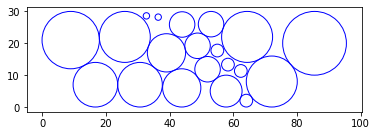

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
fig = plt.figure()
ax = plt.axes()

for i in I:
    c = patches.Circle(xy=(model.x[i](), model.y[i]()), radius=r[i], ec='b', fill=False)
    ax.add_patch(c)

plt.axis('scaled')
ax.set_aspect('equal')